# CS 532 Project: Asteroids Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0 Read data

In [2]:
df = pd.read_csv('data/nasa.csv')

In [3]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


## 1 Data preprocessing

### 1.1 Correlation matrix

In [4]:
X_ = df.drop(columns=['Hazardous'])
y_ = df['Hazardous']

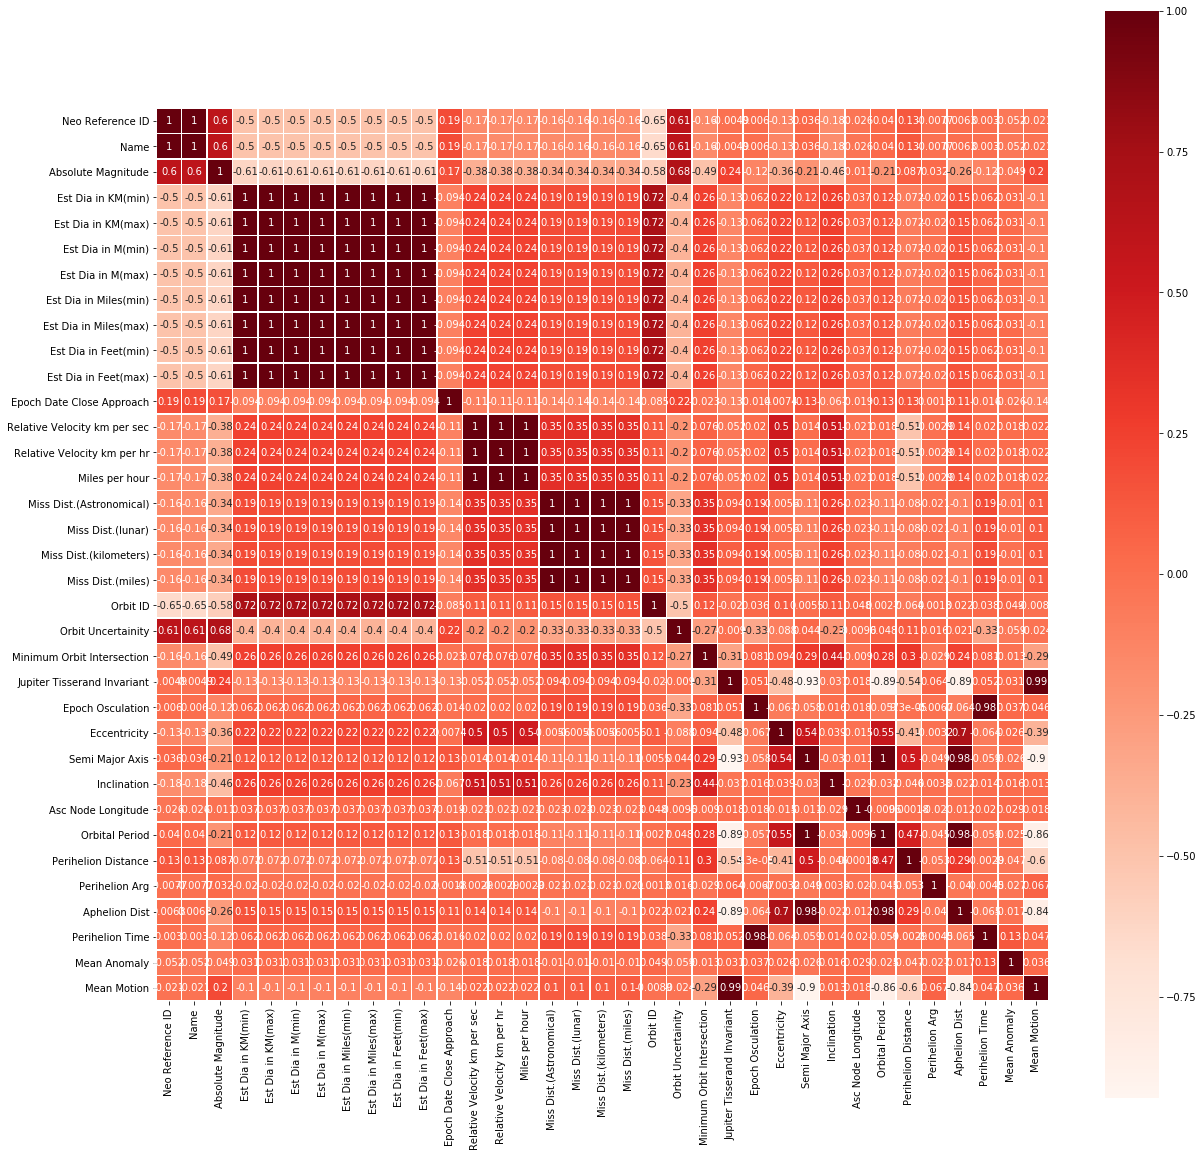

In [5]:
cor = X_.corr()

plt.figure(figsize=(20,20))
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True, linewidths=.5)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [6]:
X_.shape

(4687, 39)

In [7]:
X_.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox'],
      dtype='object')

### 1.2 Feature selection

Drop the highly correlated features. Drop the non-numeric features. Drop the features with one single common value.

In [8]:
selected_features = ['Neo Reference ID', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 
                     'Miles per hour', 'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity', 
                     'Minimum Orbit Intersection', 
                     'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Inclination', 
                     'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 
                     'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']

In [9]:
X = X_[selected_features]

Convert the Boolean label to (+1)/(-1). 

In [10]:
y = y_
y[y_==True] = 1
y[y_==False] = -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


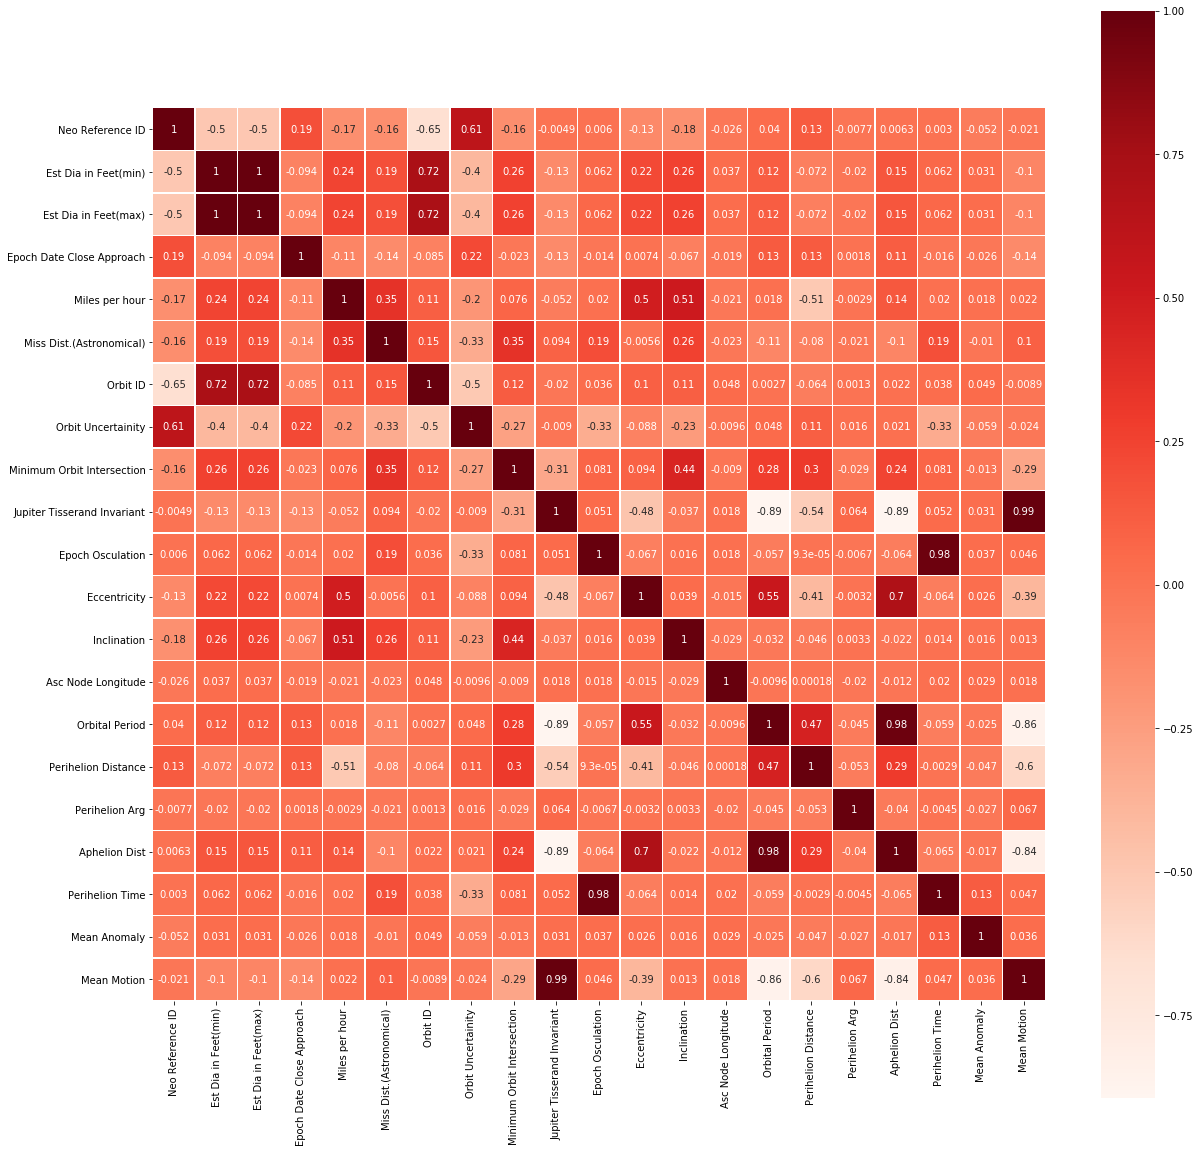

In [11]:
cor = X.corr()

plt.figure(figsize=(20,20))
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True, linewidths=.5)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
X.shape

(4687, 21)

### 1.3 normalization

In [13]:
# X_ = (X-np.min(X))/(np.max(X) - np.min(X))
X = np.asarray(X)
X_ = np.zeros(X.shape)
for j in range(X.shape[1]):
    X_[:,j] = X[:,j]/np.linalg.norm(X[:,j])
X_

array([[0.01630215, 0.00439934, 0.00439934, ..., 0.01460929, 0.01836362,
        0.01059888],
       [0.01639405, 0.00505112, 0.00505112, ..., 0.01460711, 0.01204707,
        0.0151715 ],
       [0.01077188, 0.00800549, 0.00800549, ..., 0.01460904, 0.02030901,
        0.01003927],
       ...,
       [0.01655148, 0.00265087, 0.00265087, ..., 0.01461011, 0.0141106 ,
        0.00936314],
       [0.0165515 , 0.00401225, 0.00401225, ..., 0.01461004, 0.01411225,
        0.00975922],
       [0.01660987, 0.0138544 , 0.0138544 , ..., 0.01461022, 0.0128153 ,
        0.00988417]])

In [14]:
np.mean(X_, axis=0)

array([0.01440571, 0.00707534, 0.00707534, 0.01440502, 0.01294883,
       0.01270233, 0.00868115, 0.01099169, 0.0098411 , 0.01418782,
       0.01460671, 0.01321121, 0.01130795, 0.01252607, 0.0126156 ,
       0.01400005, 0.01272967, 0.01317452, 0.01460671, 0.01256204,
       0.01324955])

### 1.4 split the training set and the testing set

In [15]:
X_train = np.asarray(X_)[:int(0.7*len(X_)), :]
y_train = np.asarray(y)[:int(0.7*len(X_))]
y_train = y_train.reshape((y_train.shape[0],1))

X_test = np.asarray(X_)[int(0.7*len(X_)):, :]
y_test = np.asarray(y)[int(0.7*len(X_)):]
y_test = y_test.reshape((y_test.shape[0],1))

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3280, 21)
(1407, 21)
(3280, 1)
(1407, 1)


## 2 Linear Regression Algorithm design

### 2.1 Linear regression

#### 2.1.1 Least-Squares

In [17]:
w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
w

array([[-8.42462835e+00],
       [-5.23613031e+07],
       [ 5.23612940e+07],
       [-4.66607954e+00],
       [ 2.69741150e+00],
       [ 4.41836402e+00],
       [ 8.42831590e+00],
       [-2.53952733e+01],
       [-3.70322535e+01],
       [ 7.90022958e+01],
       [ 2.33314016e+04],
       [ 3.19393090e+01],
       [ 1.25057825e+01],
       [ 1.72352514e+00],
       [-1.16991957e+01],
       [ 2.52287913e+01],
       [-6.72261469e-01],
       [ 1.36499005e+01],
       [-2.34359006e+04],
       [ 4.90537923e+00],
       [-4.25996943e+01]])

In [18]:
y_hat_train = np.sign(X_train@w)

In [19]:
er_num_train = np.sum(y_hat_train!=y_train)
err_train = er_num_train/y_train.shape[0]
acc_train = 1 - err_train
print("Training accuracy: " + str(np.round(acc_train*100,2)) + "%")

Training accuracy: 86.46%


In [20]:
y_hat_test = np.sign(X_test@w)

In [21]:
er_num_test = np.sum(y_hat_test!=y_test)
err_test = er_num_test/y_test.shape[0]
acc_test = 1 - err_test
print("Testing accuracy: " + str(np.round(acc_test*100,2)) + "%")

Testing accuracy: 90.33%


#### 2.1.2 Least-Squares with SVD

In [22]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

In [23]:
w = VT.T@np.diag(1/(s**2))@U.T@y_train

In [24]:
y_hat_train = np.sign(X_train@w)

In [25]:
er_num_train = np.sum(y_hat_train!=y_train)
err_train = er_num_train/y_train.shape[0]
acc_train = 1 - err_train
print("Training accuracy: " + str(np.round(acc_train*100,2)) + "%")

Training accuracy: 48.87%


In [26]:
y_hat_test = np.sign(X_test@w)

In [27]:
er_num_test = np.sum(y_hat_test!=y_test)
err_test = er_num_test/y_test.shape[0]
acc_test = 1 - err_test
print("Testing accuracy: " + str(np.round(acc_test*100,2)) + "%")

Testing accuracy: 48.19%


### 2.2 Ridge regression

$\min ||Xw -y||_2^2 + \lambda||w||_2^2$

#### 2.2.1 Ridge regression with least-squares

k-fold cross-validation is applied.

In [28]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [29]:
Lambda = np.logspace(-2, 2, base=10, num=50)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
lam_opt2 = None

for lam in Lambda:
    bias_mean = []
    var_mean = []
    loss_mean = []
    acc_mean = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        w_cur = np.linalg.inv(X_train_cur.T@X_train_cur + lam*np.eye(X_train_cur.shape[1]))@X_train_cur.T@y_train_cur
    
        y_hat_val = np.sign(X_val_cur@w_cur)
        bias_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2
        var_cur = np.linalg.norm(w_cur, 2)**2
    
        loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2 + np.linalg.norm(w_cur, 2)**2
        
        bias_mean.append(bias_cur)
        var_mean.append(var_cur)
        loss_mean.append(loss_cur)
        
        er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
        err = er_num/y_hat_val.shape[0]
        acc_cur = 1 - err
        
        acc_mean.append(acc_cur)

    bias = np.mean(bias_mean)
    var = np.mean(var_mean)
    loss = np.mean(loss_mean)
    acc = np.mean(acc_mean)
    
    if loss < loss_opt:
        loss_opt = loss
        lam_opt = lam
        acc_opt = acc
        
    Bias.append(bias)
    Variance.append(var)
    Loss.append(loss)
    Acc.append(acc)
    print("lambda = " + str(lam) + ", loss: " + str(np.round(loss,2)) + ", bias: " + str(np.round(bias,2)) \
          + ", variance: " + str(np.round(var,2)))

print("\nOptimal lam: " + str(lam_opt) +". Optimal loss:" + str(np.round(loss_opt,2)) + ". Testing accuracy: " + str(np.round(acc, 4)))

lambda = 0.01, loss: 2516.92, bias: 130.94, variance: 2385.98
lambda = 0.012067926406393288, loss: 2445.21, bias: 130.97, variance: 2314.24
lambda = 0.014563484775012436, loss: 2370.13, bias: 131.03, variance: 2239.1
lambda = 0.017575106248547922, loss: 2290.8, bias: 131.12, variance: 2159.68
lambda = 0.021209508879201904, loss: 2206.45, bias: 131.25, variance: 2075.2
lambda = 0.025595479226995357, loss: 2116.52, bias: 131.43, variance: 1985.09
lambda = 0.030888435964774818, loss: 2020.64, bias: 131.68, variance: 1888.96
lambda = 0.0372759372031494, loss: 1918.7, bias: 132.01, variance: 1786.69
lambda = 0.04498432668969444, loss: 1810.9, bias: 132.47, variance: 1678.44
lambda = 0.054286754393238594, loss: 1697.8, bias: 133.06, variance: 1564.75
lambda = 0.0655128556859551, loss: 1580.35, bias: 133.82, variance: 1446.53
lambda = 0.07906043210907697, loss: 1459.9, bias: 134.78, variance: 1325.12
lambda = 0.09540954763499938, loss: 1338.18, bias: 135.96, variance: 1202.22
lambda = 0.11513

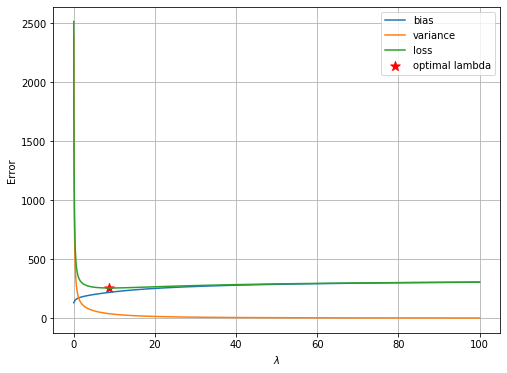

In [30]:
plt.figure(figsize=(8,6))
plt.plot(Lambda, Bias, label='bias')
plt.plot(Lambda, Variance, label='variance')
plt.plot(Lambda, Loss, label='loss')
plt.scatter(lam_opt, loss_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.legend()
plt.ylabel("Error")
plt.xlabel("$\lambda$")
plt.grid()
plt.show()

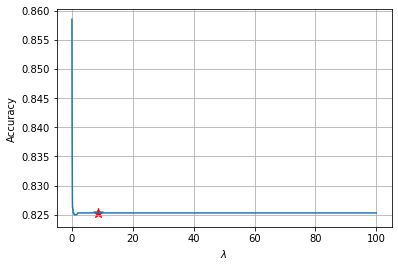

In [31]:
plt.figure()
plt.plot(Lambda, Acc, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("$\lambda$")
plt.scatter(lam_opt, acc_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.grid()
plt.show()

#### 2.2.2 Ridge regression with least-squares and SVD

k-fold cross-validation is applied.

In [32]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [33]:
Lambda = np.logspace(-1, 1, base=10, num=50)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None

for lam in Lambda:
    bias_mean = []
    var_mean = []
    loss_mean = []
    acc_mean = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        U,s,VT = np.linalg.svd(X_train_cur,full_matrices=False)
#         w_cur = np.linalg.inv(X_train_cur.T@X_train_cur + lam*np.eye(X_train_cur.shape[1]))@X_train_cur.T@y_train_cur
        w_cur = VT.T@np.linalg.inv(np.diag(s**2) + lam*np.eye(len(s)))@U.T@y_train_cur
    
        y_hat_val = np.sign(X_val_cur@w_cur)
        bias_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2
        var_cur = np.linalg.norm(w_cur, 2)**2
    
        loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2 + np.linalg.norm(w_cur, 2)**2
        
        bias_mean.append(bias_cur)
        var_mean.append(var_cur)
        loss_mean.append(loss_cur)
        
        er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
        err = er_num/y_hat_val.shape[0]
        acc_cur = 1 - err
        
        acc_mean.append(acc_cur)

    bias = np.mean(bias_mean)
    var = np.mean(var_mean)
    loss = np.mean(loss_mean)
    acc = np.mean(acc_mean)
    
    if loss < loss_opt:
        loss_opt = loss
        lam_opt = lam
        acc_opt = acc
        
    Bias.append(bias)
    Variance.append(var)
    Loss.append(loss)
    Acc.append(acc)
    print("lambda = " + str(lam) + ", loss: " + str(np.round(loss,2)) + ", bias: " + str(np.round(bias,2)) \
          + ", variance: " + str(np.round(var,2)))

print("\nOptimal lam: " + str(lam_opt) +". Optimal loss:" + str(np.round(loss_opt,2)) + ". Testing accuracy: " + str(np.round(acc, 4)))

lambda = 0.1, loss: 6103.94, bias: 206.95, variance: 5896.99
lambda = 0.10985411419875583, loss: 5623.09, bias: 204.55, variance: 5418.54
lambda = 0.12067926406393285, loss: 5172.56, bias: 202.38, variance: 4970.17
lambda = 0.13257113655901093, loss: 4750.23, bias: 200.47, variance: 4549.76
lambda = 0.14563484775012436, loss: 4354.45, bias: 198.83, variance: 4155.63
lambda = 0.15998587196060582, loss: 3983.89, bias: 197.47, variance: 3786.42
lambda = 0.1757510624854792, loss: 3637.44, bias: 196.41, variance: 3441.03
lambda = 0.193069772888325, loss: 3314.2, bias: 195.64, variance: 3118.56
lambda = 0.21209508879201905, loss: 3013.37, bias: 195.18, variance: 2818.19
lambda = 0.2329951810515372, loss: 2734.23, bias: 195.03, variance: 2539.2
lambda = 0.2559547922699536, loss: 2476.06, bias: 195.17, variance: 2280.89
lambda = 0.281176869797423, loss: 2238.15, bias: 195.6, variance: 2042.55
lambda = 0.3088843596477481, loss: 2019.75, bias: 196.3, variance: 1823.45
lambda = 0.3393221771895328

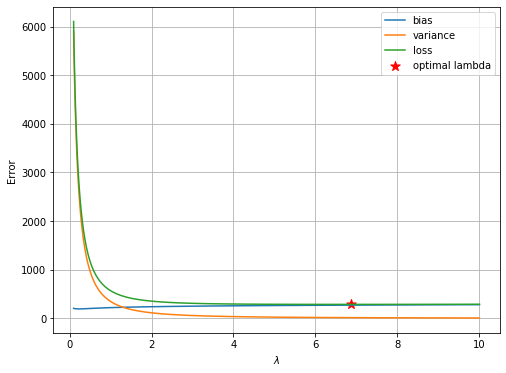

In [34]:
plt.figure(figsize=(8,6))
plt.plot(Lambda, Bias, label='bias')
plt.plot(Lambda, Variance, label='variance')
plt.plot(Lambda, Loss, label='loss')
plt.scatter(lam_opt, loss_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.legend()
plt.ylabel("Error")
plt.xlabel("$\lambda$")
plt.grid()
plt.show()

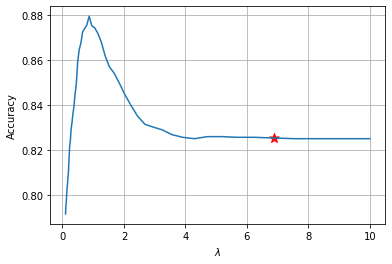

In [35]:
plt.figure()
plt.plot(Lambda, Acc, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("$\lambda$")
plt.scatter(lam_opt, acc_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.grid()
plt.show()

### 2.3 Lasso regression using gradient descent

In [36]:
def ista_solve_hot_lasso(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        w = np.zeros((n,1))
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [37]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [38]:
Lambda = np.logspace(-1, 1, base=10, num=10)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
Er_num = []

bias_mean = []
var_mean = []
loss_mean = []
acc_mean = []

err2_l1 = np.zeros(k_fold)
res2_l1 = np.zeros(k_fold)

for m in range(k_fold):
    X_train_cur = X_train[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train[id_val[m]]
    y_val_cur = y_train[id_val[m]]
    
    W = ista_solve_hot_lasso(X_train_cur, y_train_cur, Lambda)
#     print(W.shape)
    
    y_hat_val = np.sign(X_val_cur@W)
    
    err_v = np.zeros(len(Lambda))
    for i in range(len(Lambda)):
        err_v[i] = np.mean(y_hat_val!=y_val_cur)
    min_ind = np.argmin(err_v)
    
    err_num = np.sum(np.sign(X_test@W[:, min_ind:min_ind+1])!=y_test)
#     print(W)
    err = err_num/y_test.shape[0]
    acc = 1 - err
    Er_num.append(err_num)
    Acc.append(acc)
    print("Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))
    

# print()
print("Average error number: ", np.mean(Er_num))
print("Average accuracy: ", np.mean(Acc))

Accuracy: 0.9097370291400142. Number of misclassification: 127
Accuracy: 0.9068941009239517. Number of misclassification: 131
Accuracy: 0.906183368869936. Number of misclassification: 132
Accuracy: 0.9068941009239517. Number of misclassification: 131
Accuracy: 0.9076048329779673. Number of misclassification: 130
Accuracy: 0.9068941009239517. Number of misclassification: 131
Accuracy: 0.9090262970859986. Number of misclassification: 128
Accuracy: 0.906183368869936. Number of misclassification: 132
Accuracy: 0.9047619047619048. Number of misclassification: 134
Accuracy: 0.9040511727078892. Number of misclassification: 135
Average error number:  131.1
Average accuracy:  0.9068230277185503


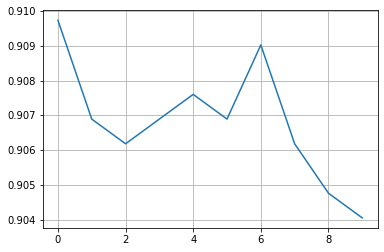

In [39]:
plt.figure()
plt.plot(Acc)
plt.grid()
plt.show()

## 3 SVM Classifier Algorithm design

### 3.1 Hinge loss with gradient descent

$\min_w \sum_{i=1}^N (1 - y_ix_i^Tw)_{+} + \lambda||w||_2^2$

$f(w)|_{w^{(k)}} = \sum_{i=1}^n(-y_ix_i I_{\{y_ix_iw^{(k)}<1\}}) + 2\lambda w^{(k)}$

$w^{(k+1)} = w^{(k)} - \tau \nabla f(w)|_{w^{(k)}}$

In [40]:
def indicator(x):
    if x < 1:
        return 1
    else:
        return 0

In [41]:
X_train.shape

(3280, 21)

In [42]:
w = np.ones((X_train.shape[1], 1))

In [43]:
w

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [44]:
X_train@w

array([[0.24213633],
       [0.28030274],
       [0.22408795],
       ...,
       [0.28342349],
       [0.28807727],
       [0.25839312]])

In [45]:
indi = np.multiply(y_train,X_train@w)
ind = np.where(indi<1, 1, 0)
np.sum(ind)

3280

In [46]:
vw = -np.multiply(np.multiply(y_train,ind),X_train)

In [47]:
vw.shape

(3280, 21)

In [48]:
lam=0.01

In [49]:
grad = np.sum(vw, axis=0).reshape(w.shape) + 2 * lam * w
grad

array([[31.61253999],
       [12.88050959],
       [12.88050959],
       [28.55503412],
       [25.43584113],
       [28.44971823],
       [12.78867381],
       [28.28866184],
       [29.56763195],
       [30.99601135],
       [31.1899533 ],
       [25.32460969],
       [24.76591748],
       [26.60644419],
       [25.7936066 ],
       [31.22115048],
       [27.25290976],
       [26.47974426],
       [31.19001675],
       [26.0001648 ],
       [29.34481477]])

In [50]:
def hinge_loss(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
#         w = np.zeros((n,1))
        for j in range(max_iter):
            w_old = w
            indi = np.multiply(d, A@w_old)
            ind = np.where(indi<1, 1, 0)
            vw = -np.multiply(np.multiply(d,ind), A)
            grad = np.sum(vw, axis=0).reshape(w_old.shape) + 2 * each_lambda * w_old
            w = w_old - tau * grad
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [51]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

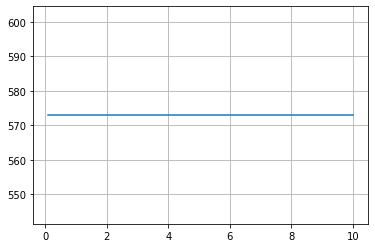

In [52]:
Lambda = np.logspace(-1, 1, base=10, num=10)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
Er_num = []

A = X_train
d = y_train

lam = 1
max_iter = 10**3
tol = 10**(-3)
tau = 1/np.linalg.norm(A,2)**2
tau = 0.1
n = A.shape[1]
w = np.zeros((n,1))

for lam in Lambda:
    for j in range(max_iter):
    #     print(w)
        w_old = w
        indi = np.multiply(d, A@w_old)
        ind = np.where(indi<1, 1, 0)
        vw = -np.multiply(d, A)
        grad = np.sum(np.multiply(vw, ind), axis=0).reshape(w_old.shape) + 2 * lam * w_old
        w = w_old - tau * grad

        err_num = np.sum(np.sign(A@w) != d)
#         print("iteration:", j, "err number:", err_num)
        if np.linalg.norm(w - w_old) < tol:
            break
    Er_num.append(err_num)


plt.figure()
plt.plot(Lambda, Er_num)
plt.grid()
plt.show()
# print("Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))


# print()
# print("Average error number: ", np.mean(Er_num))
# print("Average accuracy: ", np.mean(Acc))

In [53]:
Lambda = np.logspace(-2, 2, base=10, num=20)

Acc = []
acc_opt = 0
lam_opt = None
Er_num = []

A = X_train
d = y_train

lam = 0.1
max_iter = 10**2
tol = 10**(-2)
tau = 1/np.linalg.norm(A,2)**2

for lam in Lambda:
    w = np.zeros((A.shape[1],1))
    W = np.zeros((w.shape[0], max_iter))

    grad = np.zeros(w.shape)
    Err_num = []

    for j in range(max_iter):
        w_old = w
        for k in range(A.shape[0]):
            xi = A[k:k+1,:]
            di = d[k:k+1,:]
            if di@xi@w_old < 1:
                vi = -(di@xi).T
            else:
                vi = np.zeros(w_old.shape)
            grad += vi

        grad += 2*lam*w_old
        w = w_old - tau * grad
        W[:,j:j+1] = w

        err_num = np.sum(np.sign(X_test@w) != y_test)
        Err_num.append(err_num)

    #     print(np.linalg.norm(w - w_old))
        if np.linalg.norm(w - w_old) < tol:
            break

#     print(Err_num)
    min_ind = np.argmin(Err_num)
#     print(min_ind)
    
    err_num = Err_num[min_ind]
    Er_num.append(err_num)
    acc = 1 - err_num/y_test.shape[0]
    Acc.append(acc)
    print("Lambda =", lam, "Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))


# print()
# print("Average error number: ", np.mean(Er_num))
# print("Average accuracy: ", np.mean(Acc))

Lambda = 0.01 Accuracy: 0.9232409381663113. Number of misclassification: 108
Lambda = 0.016237767391887217 Accuracy: 0.923951670220327. Number of misclassification: 107
Lambda = 0.026366508987303583 Accuracy: 0.9267945984363894. Number of misclassification: 103
Lambda = 0.04281332398719394 Accuracy: 0.923951670220327. Number of misclassification: 107
Lambda = 0.06951927961775606 Accuracy: 0.9260838663823738. Number of misclassification: 104
Lambda = 0.11288378916846889 Accuracy: 0.9289267945984364. Number of misclassification: 100
Lambda = 0.18329807108324356 Accuracy: 0.9118692253020612. Number of misclassification: 124
Lambda = 0.29763514416313175 Accuracy: 0.9026297085998578. Number of misclassification: 137
Lambda = 0.4832930238571752 Accuracy: 0.898365316275764. Number of misclassification: 143
Lambda = 0.7847599703514611 Accuracy: 0.8742004264392325. Number of misclassification: 177
Lambda = 1.2742749857031335 Accuracy: 0.8869936034115139. Number of misclassification: 159
Lambda 

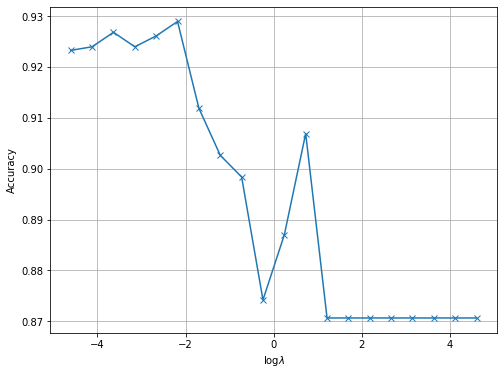

In [54]:
plt.figure(figsize=(8,6))
plt.plot(np.log(Lambda), Acc, '-x')
plt.ylabel("Accuracy")
plt.xlabel("$\log{\lambda}$")
plt.grid()
plt.show()

In [55]:
id = np.argmax(Acc)
print(np.max(Acc))
print(Lambda[id])

0.9289267945984364
0.11288378916846889


### 3.2 Kernel SVM with sk-learn

#### 3.2.1 linear SVC

In [56]:
from sklearn import svm
lin_svc = svm.LinearSVC()
lin_svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
# # y_train_pred = lin_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
acc_lin_svc_train = lin_svc.score(X_train, y_train)
print(acc_lin_svc_train)

0.8246951219512195


In [58]:
# y_test_pred = lin_svc.predict(X_test)
# print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
acc_lin_svc_test = lin_svc.score(X_test, y_test)
print(acc_lin_svc_train)

0.8246951219512195


#### 3.2.2 SVC kernel=linear

In [59]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
# y_train_pred = linear_svc.predict(X_train)
# print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
acc_linear_svc_train = linear_svc.score(X_train, y_train)
print(acc_linear_svc_train)

0.8253048780487805


In [61]:
# y_test_pred = linear_svc.predict(X_test)
# print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
acc_linear_svc_test = linear_svc.score(X_test, y_test)
print(acc_linear_svc_test)

0.8706467661691543


#### 3.2.3 SVC kernel=rbf

In [62]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
# y_train_pred = rbf_svc.predict(X_train)
# print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
print(acc_rbf_svc_train)

0.8253048780487805


In [64]:
# y_test_pred = rbf_svc.predict(X_test)
# print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
print(acc_rbf_svc_test)

0.8706467661691543


#### 3.2.4 SVC kernel=poly

In [65]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
# y_train_pred = poly_svc.predict(X_train)
# print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
acc_poly_svc_train = poly_svc.score(X_train, y_train)
print(acc_poly_svc_train)

0.8253048780487805


In [67]:
# y_test_pred = poly_svc.predict(X_test)
# print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_atest_pred))/len(y_test_pred)*100, "%")
acc_poly_svc_test = poly_svc.score(X_test, y_test)
print(acc_poly_svc_test)

0.8706467661691543


#### 3.2.5 SVC kernel=sigmoid

In [68]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
# y_train_pred = sigmoid_svc.predict(X_train)
# print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
acc_sigmoid_svc_train = sigmoid_svc.score(X_train, y_train)
print(acc_sigmoid_svc_train)

0.8253048780487805


In [70]:
# y_test_pred = sigmoid_svc.predict(X_test)
# print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
acc_sigmoid_svc_test = sigmoid_svc.score(X_test, y_test)
print(acc_sigmoid_svc_test)

0.8706467661691543


## 4 Neural networks

### 4.1 Backpropagation neural network with SGD

Network architecture:

* input layer size: $m = 21$
* hidden layer size: $p = 50$
* output layer size: $o = 1$

#### forward

$z_k = \sum_{j=1}^m w_{kj} x_j$, $h_k = \sigma(z_k) = \sigma(\sum_{j=1}^m w_{kj} x_j)$

$d = \sum_{k=1}^p v_{k} h_k$, $\hat{y} = \sigma(d) = \sigma(\sum_{k=1}^p v_{k} h_k)$

#### backpropagation

loss: $f = \sum_{i=1}^N \frac{1}{2}(\hat{y}^i - y^i)^2$

$\hat{y}^i = \sigma(d^i) = \sigma(\sum_{k=1}^P v_{k} h_k^i )$

$\begin{align}
\frac{\partial f^i}{\partial v_k} 
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial v_k^i}
\end{align}$

$\begin{align}
\frac{\partial f^i}{\partial w_{kj}^i}
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial h_k^i} \frac{\partial h_k^i}{\partial z_{k}^i} \frac{\partial z_{k}^i}{\partial w_{kj}^i}
\end{align}$

$\begin{align}\frac{\partial f^i}{\partial \hat{y}^i} 
&= \frac{\partial \frac{1}{2}(\hat{y}^i - y^i)^2}{\partial \hat{y}^i} \\
&= (\hat{y}^i - y^i)
\end{align}$

$\begin{align}\frac{\partial y^i}{\partial d^i}
&= \frac{\partial \sigma(d^i)}{\partial d^i} \\
&= \sigma(d^i) (1 - \sigma(d^i)) \\
&= \hat{y}^i (1 - \hat{y}^i)
\end{align}$

$\begin{align}\frac{\partial d^i}{\partial v_k^i}
&= \frac{\partial \sum_{k=1}^P v_{k}^i h_k^i}{\partial v_k^i} \\
&= h_k^i
\end{align}$

$\begin{align}\frac{\partial d^i}{\partial h_k^i}
&= \frac{\partial \sum_{k=1}^P v_{k}^i h_k^i}{\partial h_k^i} \\
&= v_{k}^i
\end{align}$

$\begin{align}\frac{\partial h_k^i}{\partial z_k^i}
&= \frac{\partial \sigma(z_k^i)}{\partial z_k^i} \\
&= \sigma(z_k^i)(1-\sigma(z_k^i)) \\
&= h_k^i (1 - h_k^i)
\end{align}$

$\begin{align}\frac{\partial z_k^i}{\partial w_{kj}^i}
&= \frac{\partial \sum_{j=1}^m w_{kj^i} x_j^i}{\partial w_{kj}^i} \\
&= x_j^i
\end{align}$

So,

$\begin{align}
\frac{\partial f^i}{\partial v_k} 
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial v_k^i} \\
&= (\hat{y}^i - y^i) \hat{y}^i (1 - \hat{y}^i) h_k^i
\end{align}$

$\begin{align}
\frac{\partial f^i}{\partial w_{kj}^i}
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial h_k^i} \frac{\partial h_k^i}{\partial z_{k}^i} \frac{\partial z_{k}^i}{\partial w_{kj}^i} \\
&= (\hat{y}^i - y^i) \hat{y}^i (1 - \hat{y}^i) v_{k}^i h_k^i (1 - h_k^i) x_j^i
\end{align}$

In [72]:
y_train_ = np.sign(y_train)/2+.5
p = X_train.shape[1] #features
n = X_train.shape[0] #examples

## Train NN
Xb = np.hstack((np.ones((n,1)), X_train))
M = 50 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, 1); 
W = np.random.randn(p+1, M);

alpha = 1 #step size
L = 500 #number of epochs

def sigmoid(_x):
    return 1/(1+np.exp(-_x))

Acc = []
W_list = []
V_list = []

for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = sigmoid(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
        Yhat = sigmoid(H@V)

         # Backpropagate
        delta = (Yhat - y_train_[[i],:]) * Yhat * (1 - Yhat)
        Vnew = V - alpha * H.T@delta
        gamma = delta@V[1:,:].T * H[:,1:] * (1 - H[:,1:])
        Wnew = W - alpha* Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
        
    H = sigmoid(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = sigmoid(H@V)
#     print(Yhat)
    err = np.sum(abs(np.round(Yhat)-y_train_))
    acc = 1 - err/n
    if epoch %10 ==0:
        print("Epoch:", epoch, "Accuracy:", acc)
        
    Acc.append(acc)
    W_list.append(W)
    V_list.append(V)

Epoch: 0 Accuracy: 0.8253048780487805
Epoch: 1 Accuracy: 0.8253048780487805
Epoch: 2 Accuracy: 0.8253048780487805
Epoch: 3 Accuracy: 0.8253048780487805
Epoch: 4 Accuracy: 0.825
Epoch: 5 Accuracy: 0.8243902439024391
Epoch: 6 Accuracy: 0.825
Epoch: 7 Accuracy: 0.823780487804878
Epoch: 8 Accuracy: 0.825
Epoch: 9 Accuracy: 0.825
Epoch: 10 Accuracy: 0.8243902439024391
Epoch: 11 Accuracy: 0.8243902439024391
Epoch: 12 Accuracy: 0.823780487804878
Epoch: 13 Accuracy: 0.8240853658536585
Epoch: 14 Accuracy: 0.8243902439024391
Epoch: 15 Accuracy: 0.8536585365853658
Epoch: 16 Accuracy: 0.825
Epoch: 17 Accuracy: 0.8246951219512195
Epoch: 18 Accuracy: 0.825
Epoch: 19 Accuracy: 0.8246951219512195
Epoch: 20 Accuracy: 0.8310975609756097
Epoch: 21 Accuracy: 0.8253048780487805
Epoch: 22 Accuracy: 0.8402439024390244
Epoch: 23 Accuracy: 0.8274390243902439
Epoch: 24 Accuracy: 0.8265243902439025
Epoch: 25 Accuracy: 0.8310975609756097
Epoch: 26 Accuracy: 0.8295731707317073
Epoch: 27 Accuracy: 0.825609756097561

Epoch: 213 Accuracy: 0.9146341463414634
Epoch: 214 Accuracy: 0.8585365853658536
Epoch: 215 Accuracy: 0.9060975609756098
Epoch: 216 Accuracy: 0.9094512195121951
Epoch: 217 Accuracy: 0.8996951219512195
Epoch: 218 Accuracy: 0.9067073170731708
Epoch: 219 Accuracy: 0.9015243902439024
Epoch: 220 Accuracy: 0.9094512195121951
Epoch: 221 Accuracy: 0.874390243902439
Epoch: 222 Accuracy: 0.7884146341463415
Epoch: 223 Accuracy: 0.9079268292682927
Epoch: 224 Accuracy: 0.8780487804878049
Epoch: 225 Accuracy: 0.886280487804878
Epoch: 226 Accuracy: 0.9121951219512195
Epoch: 227 Accuracy: 0.8911585365853658
Epoch: 228 Accuracy: 0.8710365853658537
Epoch: 229 Accuracy: 0.9161585365853658
Epoch: 230 Accuracy: 0.9152439024390244
Epoch: 231 Accuracy: 0.9009146341463414
Epoch: 232 Accuracy: 0.8472560975609756
Epoch: 233 Accuracy: 0.910670731707317
Epoch: 234 Accuracy: 0.9064024390243902
Epoch: 235 Accuracy: 0.9134146341463415
Epoch: 236 Accuracy: 0.8338414634146342
Epoch: 237 Accuracy: 0.9045731707317073
Epo

Epoch: 421 Accuracy: 0.8588414634146342
Epoch: 422 Accuracy: 0.9222560975609756
Epoch: 423 Accuracy: 0.9310975609756098
Epoch: 424 Accuracy: 0.9164634146341464
Epoch: 425 Accuracy: 0.9173780487804878
Epoch: 426 Accuracy: 0.9332317073170732
Epoch: 427 Accuracy: 0.8917682926829268
Epoch: 428 Accuracy: 0.9326219512195122
Epoch: 429 Accuracy: 0.9304878048780487
Epoch: 430 Accuracy: 0.9295731707317073
Epoch: 431 Accuracy: 0.9295731707317073
Epoch: 432 Accuracy: 0.9280487804878049
Epoch: 433 Accuracy: 0.9298780487804879
Epoch: 434 Accuracy: 0.925609756097561
Epoch: 435 Accuracy: 0.9088414634146341
Epoch: 436 Accuracy: 0.9307926829268293
Epoch: 437 Accuracy: 0.9094512195121951
Epoch: 438 Accuracy: 0.9286585365853659
Epoch: 439 Accuracy: 0.9393292682926829
Epoch: 440 Accuracy: 0.9378048780487804
Epoch: 441 Accuracy: 0.938109756097561
Epoch: 442 Accuracy: 0.9341463414634146
Epoch: 443 Accuracy: 0.8448170731707317
Epoch: 444 Accuracy: 0.9393292682926829
Epoch: 445 Accuracy: 0.925
Epoch: 446 Accu

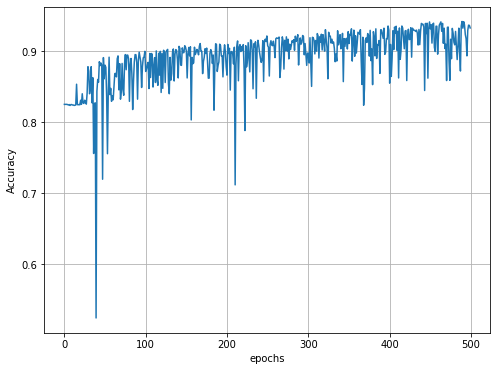

In [73]:
plt.figure(figsize=(8,6))
plt.plot(Acc, '-')
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.grid()
plt.show()

In [74]:
id = np.argmax(Acc)
print(np.max(Acc))

0.9420731707317073


In [75]:
W_opt = W_list[id]
V_opt = V_list[id]

In [76]:
Xb_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
H_test = sigmoid(np.hstack((np.ones((X_test.shape[0],1)), Xb_test@W_opt)))
Yhat_test = sigmoid(H_test@V_opt)
y_pred_test = np.round(Yhat_test)
y_test_ = np.sign(y_test)/2+.5

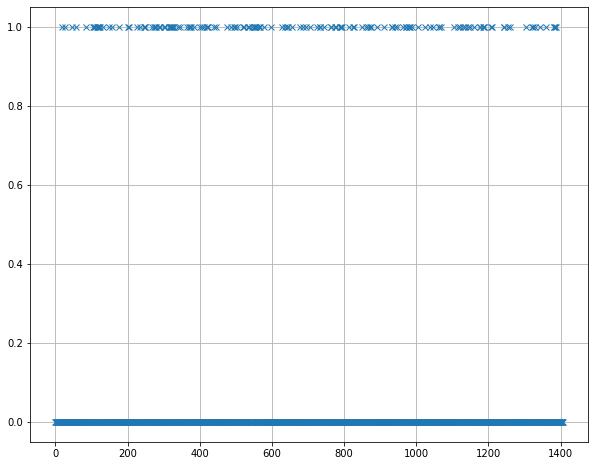

In [77]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test, 'x')
plt.grid()
plt.show()

In [78]:
err = np.sum(abs(y_pred_test - y_test_))
acc = 1 - err/n
print("Test accuracy:", acc*100, "%")

Test accuracy: 97.92682926829268 %


### 4.2 Neural network with Pytorch

In [80]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [99]:
# y_train[y_==False] = 0
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.squeeze(torch.from_numpy(y_train).float())
y_train_t[y_train_t==-1] = 0
X_test_t = torch.from_numpy(X_test).float()
y_test_t = torch.squeeze(torch.from_numpy(y_test).float())
y_test_t[y_test_t==-1] = 0

In [100]:
X_train_t.shape, y_train_t.shape

(torch.Size([3280, 21]), torch.Size([3280]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


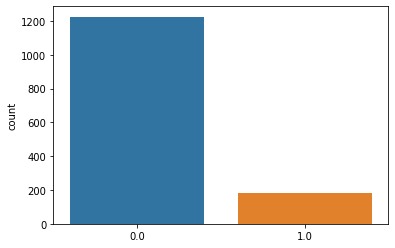

In [106]:
sns.countplot(np.asarray(y_test_t));

In [107]:
n_feature = X_train_t.shape[1]

In [108]:
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, 30)
        self.fc3 = nn.Linear(30, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))
    
net = Net(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [109]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train_t = X_train_t.to(device)
y_train_t = y_train_t.to(device)
X_test_t = X_test_t.to(device)
y_test_t = y_test_t.to(device)
net = net.to(device)
criterion = criterion.to(device)

In [110]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

In [111]:
Train_loss = []
Test_loss = []
Train_acc = []
Test_acc = []

for epoch in range(1000):
    y_pred = net(X_train_t)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train_t)
    train_acc = calculate_accuracy(y_train_t, y_pred)
    
    y_test_pred = net(X_test_t)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, y_test_t)
    test_acc = calculate_accuracy(y_test_t, y_test_pred)

    Train_loss.append(train_loss)
    Test_loss.append(test_loss)
    Train_acc.append(train_acc)
    Test_acc.append(test_acc)
    if epoch % 100 == 0:
        print(
        f'''epoch {epoch} :
        Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
        Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0 :
        Train set - loss: 0.643, accuracy: 0.825
        Test  set - loss: 0.636, accuracy: 0.871
epoch 100 :
        Train set - loss: 0.441, accuracy: 0.825
        Test  set - loss: 0.367, accuracy: 0.871
epoch 200 :
        Train set - loss: 0.298, accuracy: 0.86
        Test  set - loss: 0.224, accuracy: 0.897
epoch 300 :
        Train set - loss: 0.137, accuracy: 0.957
        Test  set - loss: 0.117, accuracy: 0.959
epoch 400 :
        Train set - loss: 0.086, accuracy: 0.971
        Test  set - loss: 0.077, accuracy: 0.974
epoch 500 :
        Train set - loss: 0.06, accuracy: 0.982
        Test  set - loss: 0.05, accuracy: 0.984
epoch 600 :
        Train set - loss: 0.043, accuracy: 0.989
        Test  set - loss: 0.035, accuracy: 0.99
epoch 700 :
        Train set - loss: 0.033, accuracy: 0.993
        Test  set - loss: 0.026, accuracy: 0.993
epoch 800 :
        Train set - loss: 0.026, accuracy: 0.995
        Test  set - loss: 0.021, accuracy: 0.994
epoch 900 :
    

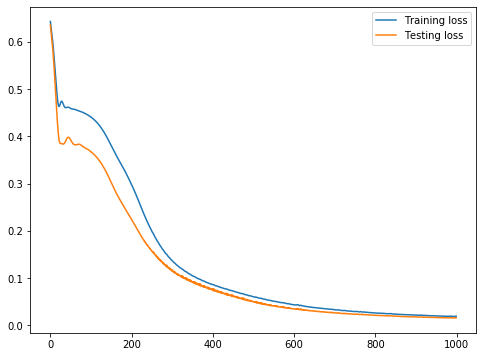

In [112]:
plt.figure(figsize=(8,6))
plt.plot(Train_loss, label='Training loss')
plt.plot(Test_loss, label='Testing loss')
plt.legend()
plt.show()

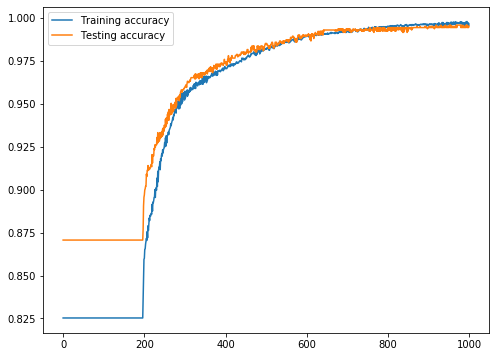

In [113]:
plt.figure(figsize=(8,6))
plt.plot(Train_acc, label='Training accuracy')
plt.plot(Test_acc, label='Testing accuracy')
plt.legend()
plt.show()